# LAB-1: Project Air Quality - Data Analysis

### Problem:

Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100% relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. 
The humidity of the air, if it is not maintained at optimal levels, can be a factor that has adverse affects on people's health. According to reports, the human body is said to be most comfortable when the relative humidity of the area ranges between 20 and 60%.

### Objective

We **investigate the change of the Relative Humidity (RH)** by finding the correlation between the RH values and the all other attributes.

### Dataset: Air quality

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer [1].

**Attributes of the dataset are:**

|Sl No|	|Attribute|	|Description|
|-|	|-|	|-|
|0|	|Date|	|Date (DD/MM/YYYY) |
|1|	|Time|	|Time (HH.MM.SS) |
|2|	|CO(GT)|	|True hourly averaged concentration CO in mg/m^3 (reference analyzer) |
|3|	|PT08.S1(CO)|	|PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)|
|4|	|NMHC(GT)|	|True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)|
|5|	|C6H6(GT)|	|True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) |
|6|	|PT08.S2(NMHC)|	|PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) |
|7|	|NOx(GT)|	|True hourly averaged NOx concentration in ppb (reference analyzer) |
|8|	|PT08.S3(NOx)|	|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) |
|9|	|NO2(GT)|	|True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) |
|10|	|PT08.S4(NO2)|	|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) |
|11|	|PT08.S5(O3)|	|PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) |
|12|	|T|	|Temperature in Â°C |
|13|	|RH|	|Relative Humidity (%) |
|14|	|AH|	|AH Absolute Humidity|

### General Announcements

* The exercises on this sheet are graded by a maximum of **12 points**. You will be asked to implement several functions.
* Team work is not allowed! Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 
* If you use any code fragments found on the Internet, make sure you reference them properly.
* You can send your questions via email to the TAs until the deadline.

### <u>Grading:<u>

[1) Load data ](#load_data) (2 points)
    
[2) Basic statistics](#stat) (1 point)
    
[3) Data Cleaning](#hr) (3 points)
    
[4) Co-relation between variables](#corr)  (3 points)
    
[5) Influence of features on output-RH](#lin) (3 points)

### References:
[1] S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005

In [91]:
# Importing the Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 10, 8

#### 1) Load data<a name="load_data"></a>


- Use `pandas.read_csv('path/to/dataset.csv',header=None,skiprows=1,names=col,na_filter=True, na_values=-200,usecols=use)` to load the data. (0.25 points)

In [2]:
# Defining header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

# Defining number of columns from csv
use = list(np.arange(len(col)))

# Reading the data from csv
df_air = pd.read_csv(
    '/Users/tunayildiz/Desktop/UZH/MachineLearningforSciences/Datasets/AirQualityUCI.csv',  # Write the path of the Air Quality Dataset
    header=None, skiprows=1, names=col, na_filter=True, na_values=-200, usecols=use
)

- Visualize the first and the last 7 rows of the data. (0.25 points)

In [3]:
print('First 7 Rows:')
df_air[0:7]
# Your Code

First 7 Rows:


,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603


In [9]:
print('Last 7 Rows:')
df_air.tail(7)
# Your Code

Last 7 Rows:


,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Print the dtypes in the dataframe (0.25 points)

In [12]:
# Your Code
df_air.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

- Print dataframe shape (Number of Columns and Rows) (0.25 points)

In [13]:
# Your Code
df_air.shape

(9471, 15)

- Drop **ONLY** rows containing **ALL** NaN (not a number) values (0.5 points)

NOTE: Don't forget to use `inplace=True` (See: https://www.geeksforgeeks.org/what-does-inplace-mean-in-pandas/)

In [24]:
# Your Code
df_air.dropna(axis=0, thresh= df_air.shape[1],inplace=True)
# df_air.dropna(axis=0, )

- Now, drop **ONLY** rows with the threshold equals to 10 NaN values (0.5 points)
- Print dataframe shape (how many cols & rows)

In [26]:
# Your Code
df_air.dropna(axis=1,thresh=10,inplace=True)

#### 2) Basic statistics<a name="stat"></a>

- Print dataframe statistics (mean, max & min values for each column etc.) (1 point)

NOTE: You can print with a single method.

In [36]:
# Your Code
df_air.mean(axis=1, numeric_only=True)

0       532.981369
1       487.086577
2       501.603862
3       512.322054
4       483.899138
           ...    
1226    616.802654
1227    560.088685
1228    552.704454
1229    549.210938
1230    591.434308
Length: 827, dtype: float64

#### 3) Data Cleaning<a name="hr"></a>

 - Splitting hour from time into new column (See: https://docs.python.org/3/library/stdtypes.html#string-methods)

In [37]:
df_air['HOUR'] = df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
df_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

- How many missing values do we have now? (0.5 point)

In [44]:
# Count the invalid values
# Your Code
print('Count of missing values:')
df_air.isna().sum().sum()

Count of missing values:


0

Fill missing value strategy:

 - CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour

 - NHHC_GT will be dropped as it has 90% missing data

In [45]:
# Format date column (See: https://docs.python.org/3/library/datetime.html)
print(df_air[0:5])
df_air['DATE'] = pd.to_datetime(df_air.DATE, format='%m/%d/%Y')

        DATE      TIME  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  \
0 2004-03-10  18:00:00    2.6      1360.0    150.0     11.9        1046.0   
1 2004-03-10  19:00:00    2.0      1292.0    112.0      9.4         955.0   
2 2004-03-10  20:00:00    2.2      1402.0     88.0      9.0         939.0   
3 2004-03-10  21:00:00    2.2      1376.0     80.0      9.2         948.0   
4 2004-03-10  22:00:00    1.6      1272.0     51.0      6.5         836.0   

   NOX_GT  PT08_S3_NOX  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
0   166.0       1056.0   113.0       1692.0      1268.0  13.6  48.9  0.7578   
1   103.0       1174.0    92.0       1559.0       972.0  13.3  47.7  0.7255   
2   131.0       1140.0   114.0       1555.0      1074.0  11.9  54.0  0.7502   
3   172.0       1092.0   122.0       1584.0      1203.0  11.0  60.0  0.7867   
4   131.0       1205.0   116.0       1490.0      1110.0  11.2  59.6  0.7888   

         mean  HOUR  
0  532.981369    18  
1  487.086577    1

- Set DATE as the index (1 point)
- Print the first 5 rows

In [52]:
# Your Code
print('The first 5 rows:')
df_air.set_index('DATE' inplace=True)
df_air[0:5]
# Your Code

The first 5 rows:


,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,mean,HOUR
DATE,,,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,532.981369,18
2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,487.086577,19
2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,501.603862,20
2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,512.322054,21
2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,483.899138,22


In [53]:
# Creating "MONTH" column
df_air['MONTH']=df_air.index.month     
df_air.reset_index(inplace=True) # Run this line only once!
# NOTE: If this cell doesn't work properly, check the 'inplace' argument of indexing part.

- Drop column NMHC_GT; it has 90% missing data (1 point)

In [54]:
# Your Code
df_air.drop('NMHC_GT',axis=1,inplace=True)

Fill NaN values with monthly average of particular hour  

(See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [55]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

- Print left missing values (0.5 points)

In [62]:
print('Left out missing value:')
# Hint: Count non-nan values for each column.
# Your Code
df_air.isna().sum().sum()

Left out missing value:


0

In [63]:
# Filling left out NaN values with hourly average value
df_air['CO_GT'] = df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT'] = df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT'] = df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

#### 4) Understand correlation between variables<a name="corr"></a>
- Use heatmap to see correlation between variables (2 points)

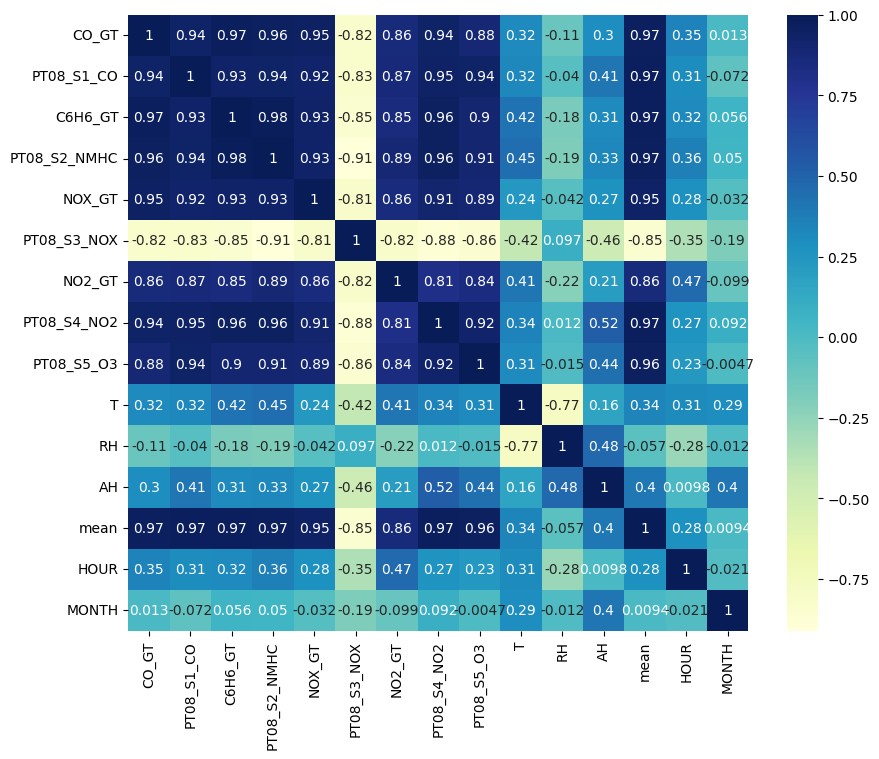

In [70]:
# Plot the heatmap
# Your Code
df_air = df_air.select_dtypes(np.number)
dataplot = sns.heatmap(df_air.corr(), cmap="YlGnBu", annot=True)
plt.show()

 - Describe the heatmap using your own words (1 point)

ANSWER:  Heatmap is a representation method where the desired outputs are shown as colors. The heatmap above is a correlation heatmap. Every data column in the dataframe is cross correlated with each other. As seen in the heatmap above, the heatmap shows 1 if the column names are matching since they are directly correlated with each other. Positive or negative shows the positive or negative proportion. As the correlation increases, the colors tend to move to blue and gets yellower vice versa as seen in the line at the right side.

#### 5) Try to understand degree of linearity between RH output and other input features<a name="lin"></a>
 - plot all X-features against output variable RH using `sns.lmplot` (use a for-loop) (2 points)

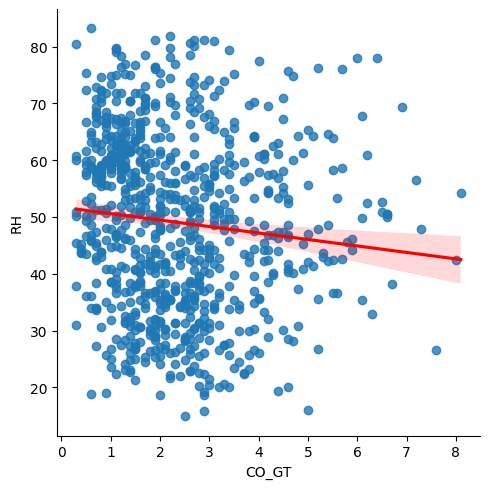

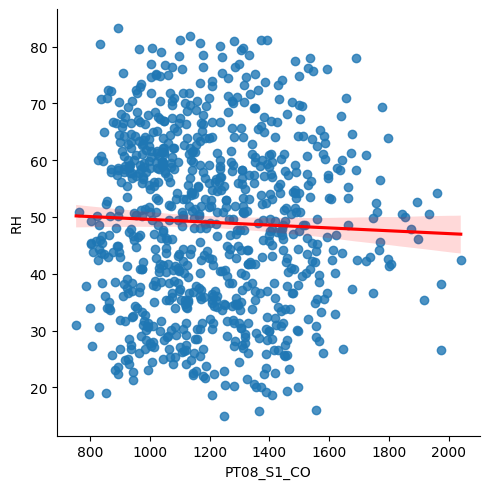

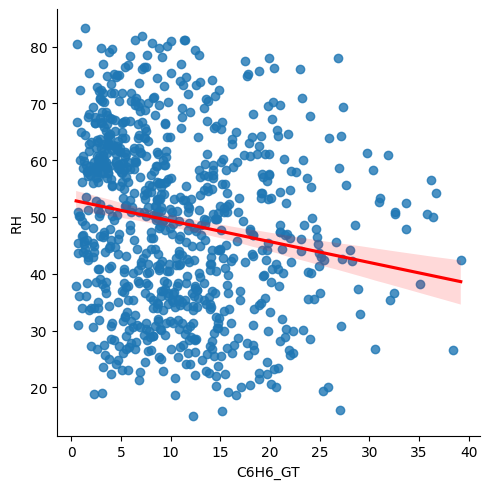

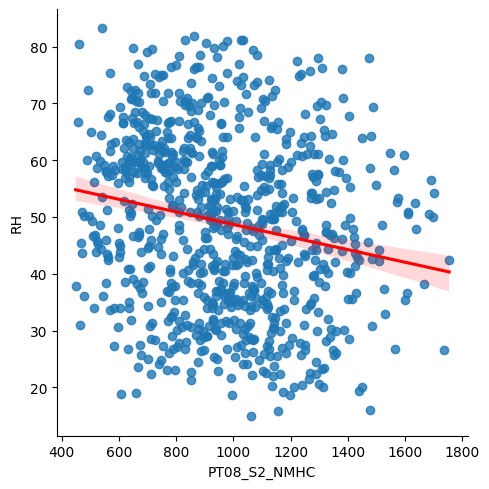

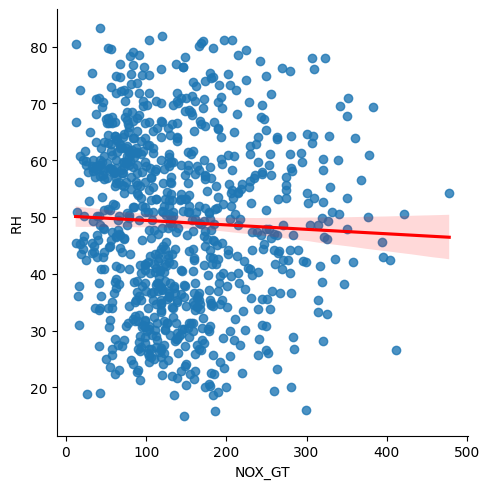

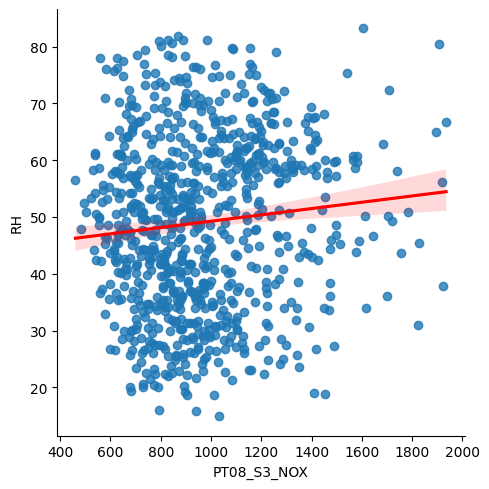

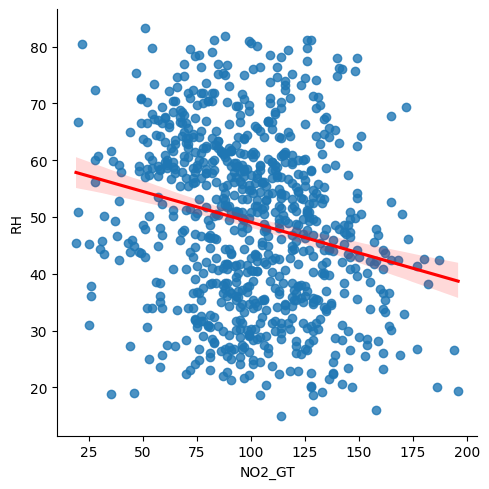

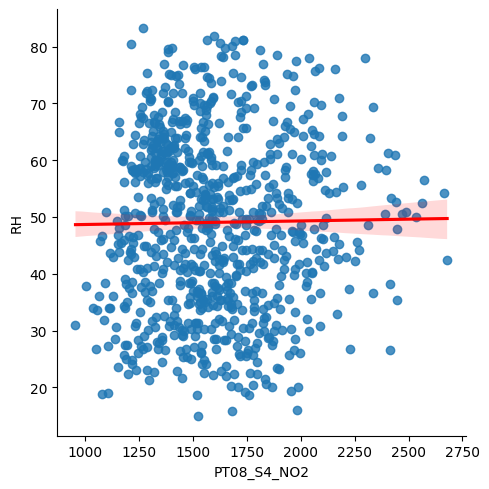

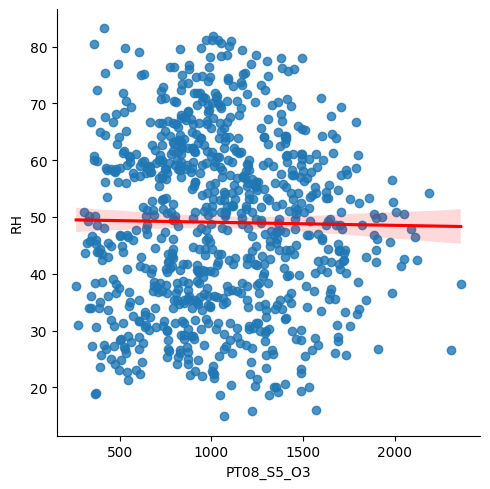

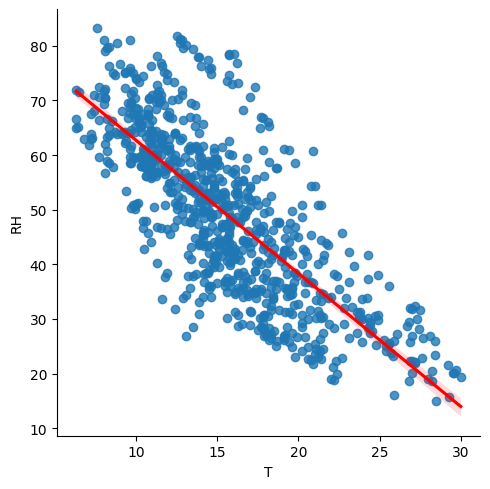

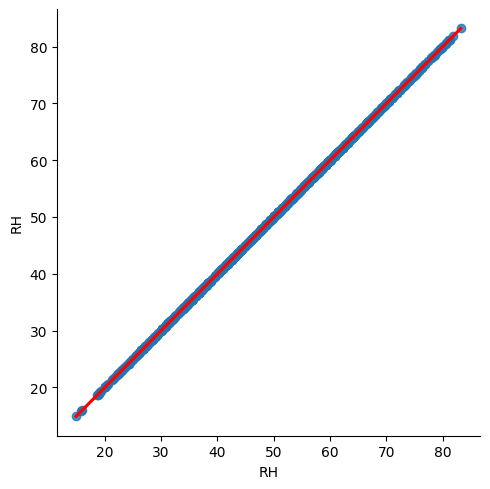

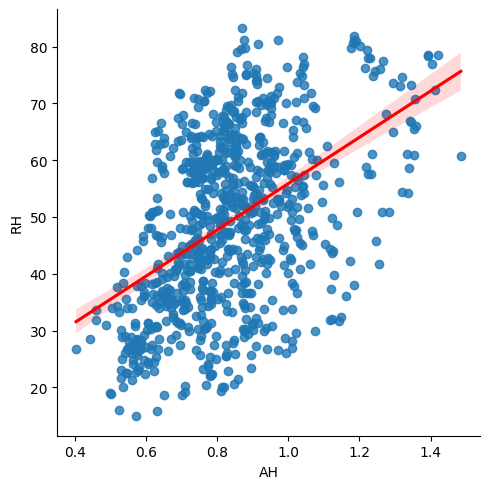

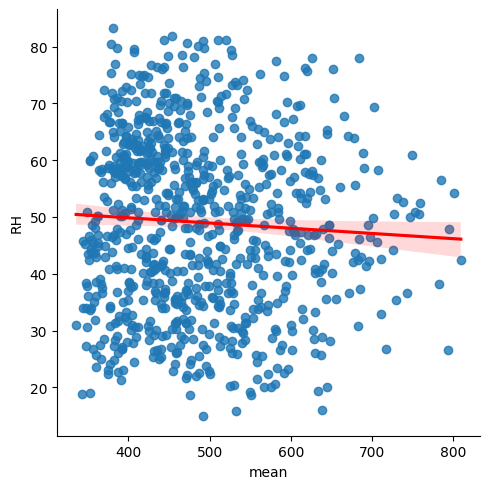

In [116]:
# plot all X-features against output variable RH (skip the date keys)
# df_air = df_air.drop(['HOUR','MONTH'],axis=1)
df_air.to_csv('lab1_final.csv', sep= ',')
df_air.dtypes
for i in df_air.columns:
    sns.lmplot(data=df_air, x=i, y = 'RH', line_kws={'color': 'red'})

    

        

- describe the results (1 point)

ANSWER: Every column of the df_air was plotted against the RH to see the correlation. Every graph has a regression line with a blurry zone around it showing the 95% confidence level. The broader the blurry line means the higher the uncertainty. Looking from the uncertainty perspective, it can be said that RH has a direct and sharp relationship with Temperature. The blurry line is very thin compared to the lines in other graphs. PT08_S4_NO2 and PT08_S5_O3 shows they do not really affect the RH since the line is nearly straight meaning the RH does not change too much as these parameters increase. Also, they do have slightly larger 95% confidence intervals meaning the uncertainty is relatively high.